In [2]:
import pandas as pd
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [5]:
ticker =['AAPL','PG','NFLX','AMZN','TSLA','FB']
my_data = pd.DataFrame()
for T in ticker:
    my_data[T] = wb.DataReader(T, data_source= 'yahoo',start='2010-01-01')['Adj Close']

In [6]:
my_data.tail(5)

,AAPL,PG,NFLX,AMZN,TSLA,FB
Date,,,,,,
2020-05-13,307.649994,113.919998,438.269989,2367.919922,790.960022,205.100006
2020-05-14,309.540009,113.809998,441.950012,2388.850098,803.330017,206.809998
2020-05-15,307.709991,114.610001,454.190002,2409.780029,799.169983,210.880005
2020-05-18,314.959991,116.209999,452.579987,2426.260010,813.630005,213.190002
2020-05-19,313.140015,112.440002,451.040009,2449.330078,808.010010,216.880005


In [8]:
sec_returns = np.log(my_data/my_data.shift(1))

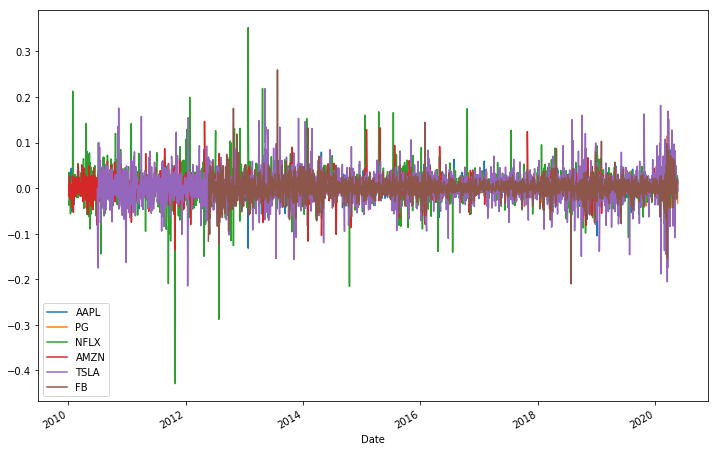

In [9]:
sec_returns.plot(figsize=(12,8))

In [67]:
mor=sec_returns.mean()*250

In [68]:
mor

AAPL    0.237960
PG      0.090452
NFLX    0.387490
AMZN    0.277743
TSLA    0.353668
FB      0.215671
dtype: float64

In [71]:
l = sec_returns['AAPL'].var()*250

In [73]:
m = sec_returns['PG'].var()*250

In [72]:
n=sec_returns['NFLX'].var()*250

In [74]:
o=sec_returns['AMZN'].var()*250

In [75]:
p=sec_returns['TSLA'].var()*250

In [76]:
q=sec_returns['FB'].var()*250

In [37]:
sec_returns[['AAPL','PG','NFLX','AMZN','TSLA','FB']].std()*250**0.5

AAPL    0.275495
PG      0.171733
NFLX    0.516512
AMZN    0.313172
TSLA    0.542803
FB      0.368429
dtype: float64

In [42]:
corr_matrix = sec_returns.corr()

In [46]:
corr_matrix

,AAPL,PG,NFLX,AMZN,TSLA,FB
AAPL,1.000000,0.361005,0.249131,0.427615,0.291672,0.371839
PG,0.361005,1.000000,0.141142,0.243637,0.145760,0.203883
NFLX,0.249131,0.141142,1.000000,0.406105,0.245308,0.279676
AMZN,0.427615,0.243637,0.406105,1.000000,0.306746,0.434548
TSLA,0.291672,0.145760,0.245308,0.306746,1.000000,0.259930
FB,0.371839,0.203883,0.279676,0.434548,0.259930,1.000000


In [47]:
weights = np.array([0.1,0.1,0.2,0.2,0.2,0.2])

In [48]:
port_variance = np.dot(weights.T,np.dot(sec_returns.cov()*250,weights))

In [54]:
print(str(round(port_variance,5)*100)+'%')

6.809%


In [58]:
##calculating Diversifiable and UnDiversifiable Risks

In [84]:
unsys_risk = (port_variance-(weights[0]**2*l)-(weights[1]**2*m)-(weights[2]**2*n)-(weights[3]**2*o)-(weights[4]**2*p)-(weights[5]**2*q))

In [85]:
unsys_risk

0.03522777516378317

In [86]:
print(str(round(unsys_risk,5)*100)+'%')

3.5229999999999997%


In [92]:
sys_risk = weights[0]**2*l+weights[1]**2*m+weights[2]**2*n+weights[3]**2*o+weights[4]**2*p+weights[5]**2*q

In [93]:
print(str(round(sys_risk,5)*100)+'%')

3.286%


In [94]:
sr=port_variance - unsys_risk

In [96]:
sr==sys_risk

True